
#Trabajo de grado (TFM)
## Distribución Efectiva de Productos
###Maria Alejandra Aranguren
#### Agosto 2023
---



Se importan los paquetes de las librerias a usar


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from tabulate import tabulate
import matplotlib.pyplot as plt

Se realiza la lectura de los datos.

Se especifica el tipo de dato para el C.O. y ID ALM pues es un número en formato de texto Ejemplo: 027, esto aplica tambien para el item Ejemplo: 0009846, para 'Cantidad inv.' Ejemplo: 1.00 y para 'Fecha' Ejemplo: 1/08/2019.

Se especifica la cantidad de columnas a tomar, con el fin de evitar columnas vacías.

In [ ]:
df_general = pd.read_csv('1.1.22-30.6.23 Ventas.txt', sep = "\t",usecols=range(17),dtype=({"C.O.": str,"Item": str,"Fecha": str,"Cantidad inv.":str}), encoding='latin1')

In [ ]:
df_especifico = pd.read_excel('dataset_especifico.xlsx', sheet_name= 'Datos',dtype=({"ID ALM": str}))

Se confirma visualmente la lectura correcta de los datasets

In [ ]:
print("Dataset general:")
df_general.head(5)

Dataset general:


,C.O.,Fecha,Item,Desc. detalle ext. 1,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,GENERO,SUB CATEGORIA,WEB COLOR,Valor descuentos local,Valor impuestos local,Valor subtotal local,Valor neto local
0,017,2/01/2022,0000737,5.5Y,1.00,FVP,Aprobada,CALZADO,NIKE,FUTBOL,INFANTIL,CESPED ARTIFICIAL,NEGRO,"$ 167,983.00","$ 31,917.00","$ 167,983.00","$ 199,900.00"
1,006,2/01/2022,0002513,L,1.00,FVP,Aprobada,ROPA,NIKE,ENTRENAMIENTO,HOMBRE,MANGA CORTA,NEGRO,"$ 12,181.00","$ 20,829.00","$ 109,626.00","$ 130,455.00"
2,017,2/01/2022,0002513,M,1.00,FVP,Aprobada,ROPA,NIKE,ENTRENAMIENTO,HOMBRE,MANGA CORTA,NEGRO,"$ 12,181.00","$ 20,829.00","$ 109,626.00","$ 130,455.00"
3,032,2/01/2022,0002513,M,1.00,FP1,Aprobada,ROPA,NIKE,ENTRENAMIENTO,HOMBRE,MANGA CORTA,NEGRO,$ 0.00,"$ 23,143.00","$ 121,807.00","$ 144,950.00"
4,039,2/01/2022,0003989,XL,1.00,FVP,Aprobada,ROPA,UNDER ARMOUR,ENTRENAMIENTO,HOMBRE,CAMISETAS DE COMPRESION,NEGRO,"$ 9,235.00","$ 15,792.00","$ 83,118.00","$ 98,910.00"


In [ ]:
print("Dataset específico:")
df_especifico.head(5)

Dataset específico:


,ID ALM,Tipo de Marca,Nivel
0,004,Multimarca,Nivel 1
1,006,Multimarca,Nivel 3
2,007,Multimarca,Nivel 3
3,009,Multimarca,Nivel 1
4,010,Multimarca,Nivel 1


Se obtienen las dimensiones de mis datasets

In [ ]:
print("Estas son las dimensiones iniciales del dataset general: \n", df_general.shape ,'\n')
print("Estas son las dimensiones iniciales del dataset especifico: \n", df_especifico.shape )

Estas son las dimensiones iniciales del dataset general: 
 (704688, 17) 

Estas son las dimensiones iniciales del dataset especifico: 
 (23, 3)


## Comprensión de los datos

###Descripción de los datos

Se genera una tabla con las columnas de cada dataset y una muestra de su formato:

In [ ]:
import pandas as pd
from tabulate import tabulate

def reporte_descripcion_dataset(df):
    columnas = df.columns
    data = []
    for col in columnas:
        tipo_dato = df[col].dtype
        formato = df[col].iloc[0] if not pd.isna(df[col].iloc[0]) else "NaN"
        data.append([col, tipo_dato, formato])

    headers = ["Columna", "Tipo de dato", "Formato"]
    print(tabulate(data, headers=headers, tablefmt="grid"))
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Dataset general:")
reporte_descripcion_dataset(df_general)


Dataset general:
+------------------------+----------------+-------------------+
| Columna                | Tipo de dato   | Formato           |
+========================+================+===================+
| C.O.                   | object         | 017               |
+------------------------+----------------+-------------------+
| Fecha                  | object         | 2/01/2022         |
+------------------------+----------------+-------------------+
| Item                   | object         | 0000737           |
+------------------------+----------------+-------------------+
| Desc. detalle ext. 1   | object         | 5.5Y              |
+------------------------+----------------+-------------------+
| Cantidad inv.          | object         | 1.00              |
+------------------------+----------------+-------------------+
| Tipo docto.            | object         | FVP               |
+------------------------+----------------+-------------------+
| Estado               

In [ ]:
import pandas as pd
from tabulate import tabulate

def reporte_descripcion_dataset(df):
    columnas = df.columns
    data = []
    for col in columnas:
        tipo_dato = df[col].dtype
        formato = df[col].iloc[0] if not pd.isna(df[col].iloc[0]) else "NaN"
        data.append([col, tipo_dato, formato])

    headers = ["Columna", "Tipo de dato", "Formato"]
    print(tabulate(data, headers=headers, tablefmt="grid"))
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Dataset específico:")
reporte_descripcion_dataset(df_especifico)

Dataset específico:
+---------------+----------------+------------+
| Columna       | Tipo de dato   | Formato    |
+===============+================+============+
| ID ALM        | object         | 004        |
+---------------+----------------+------------+
| Tipo de Marca | object         | Multimarca |
+---------------+----------------+------------+
| Nivel         | object         | Nivel 1    |
+---------------+----------------+------------+

Cantidad de filas: 23


#Apéndice II:

### Verificación de la calidad de los datos

#### Missing Values

Se hace un mapa de calor para identificar 'missing values' donde el color azul  representa las celdas sin valores nulos y el amarillo las celdas con valores nulos

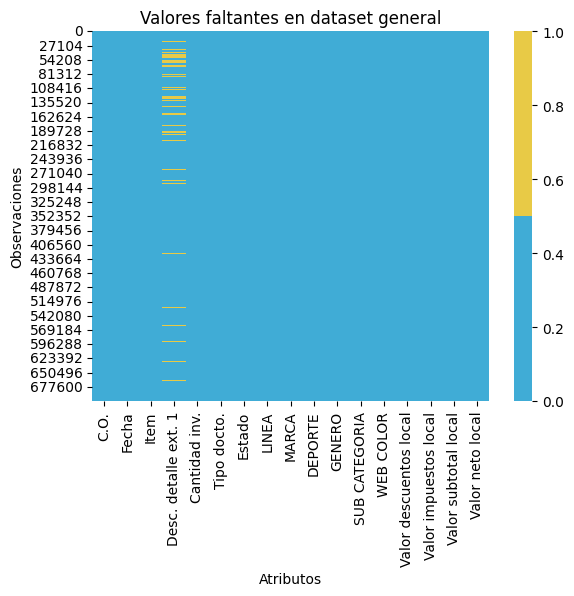

In [ ]:
cols = df_general.columns[:]
colours = ['#40acd6','#e8ca46']
ax =sns.heatmap(df_general[cols].isnull(), cmap=sns.color_palette(colours))

ax.set_title('Valores faltantes en dataset general')
ax.set_xlabel('Atributos')
ax.set_ylabel('Observaciones')

plt.show()

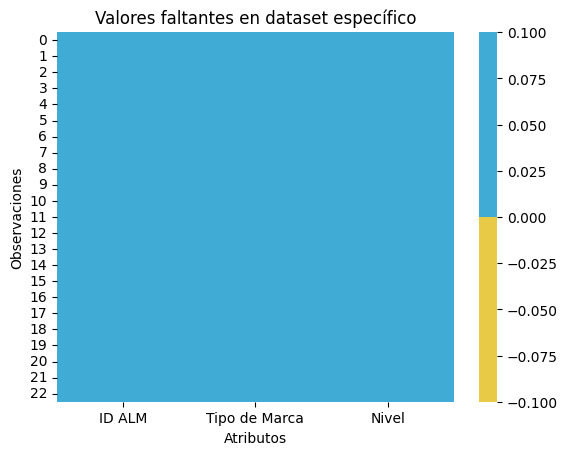

In [ ]:
cols = df_especifico.columns[:]
colours = ['#e8ca46','#40acd6']
ax =sns.heatmap(df_especifico[cols].isnull(), cmap=sns.color_palette(colours))

ax.set_title('Valores faltantes en dataset específico')
ax.set_xlabel('Atributos')
ax.set_ylabel('Observaciones')

plt.show()

Se obtienen las cantidades de valores nulos y vacíos por columna para el dataset general

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 05MBID del presente master.

# Se crea un diccionario para almacenar la cantidad de valores faltantes por columna
nulos_por_columna = {}

# Se genera la iteracion sobre las columnas del dataset
for col in df_general.columns:
    nulos = df_general[col].isna().sum()  # Cuenta los valores nulos
    vacios = (df_general[col].str.strip() == '').sum() # Cuenta los valores vacíos
    nulos_por_columna[col] = nulos + vacios  # Suma los valores nulos y los vacíos

#  Se crea un DataFrame a partir del diccionario
nulos_x_columna = pd.DataFrame(nulos_por_columna.items(), columns=['Columna', 'Cantidad de Nulos y Vacíos'])

print(f"Cantidad de filas que tienen valores nulos y vacíos por atributo para el dataset general:\n \n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos y vacíos por atributo para el dataset general:
 
                   Columna  Cantidad de Nulos y Vacíos
0                     C.O.                           0
1                    Fecha                           0
2                     Item                           0
3     Desc. detalle ext. 1                       76711
4            Cantidad inv.                           0
5              Tipo docto.                           0
6                   Estado                           0
7                    LINEA                       82010
8                    MARCA                       82010
9                  DEPORTE                       82010
10                  GENERO                       82010
11           SUB CATEGORIA                       82010
12               WEB COLOR                       82010
13  Valor descuentos local                           0
14   Valor impuestos local                           0
15    Valor subtotal local  

#### Cumplimiento de formato de datos dataset general

Se verifica que el formato en el atributo 'C.O.' sea válido, se es válido cuando el formato contiene 3 caracteres numéricos

In [ ]:
# Se realiza una adaptación  del código utilizado en la materia 13MBID del presente master.

# Se establece el formato ideal en el atributo y se realiza la comparación del formato actual vs el formato ideal
df_general['formato_correcto_co'] = df_general['C.O.'].astype(str).str.match("^[0-9]{3}$")

# Visualizar filas con errores de formateo
print("Se visualizan las filas con errores de formateo:")
display(df_general[~df_general.formato_correcto_co])

# Filtrar filas con valores incorrectos
conteo = df_general[~df_general.formato_correcto_co]

# Contar la cantidad de errores de formateo
print(f"Cantidad detectada de formato erroneo en el número de tienda: {conteo.shape[0]}")

Se visualizan las filas con errores de formateo:


,C.O.,Fecha,Item,Desc. detalle ext. 1,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,GENERO,SUB CATEGORIA,WEB COLOR,Valor descuentos local,Valor impuestos local,Valor subtotal local,Valor neto local,formato_correcto_co


Cantidad detectada de formato erroneo en el número de tienda: 0


Se verifica que el formato en el atributo 'Fecha' sea válido, se es válido cuando el formato es dd/mm/yyyy

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.

# Se establece el formato ideal en el atributo
def deteccion_tipo_fecha(row):
    fecha = row['Fecha']
    formato = '%d/%m/%Y'
    try:
        res = bool(datetime.strptime(fecha, formato))
    except ValueError:
        res = False

    return res

# Se realiza la comparación del formato actual vs el formato ideal
df_general['formato_correcto_fecha'] = df_general.apply(lambda x : deteccion_tipo_fecha(x), axis = 1).rename('formato_correcto_fecha')

#A partir de esto se podría verificar a través de una nueva columna auxiliar

print("Se visualizan las filas con errores de formateo:")
display(df_general[df_general.formato_correcto_fecha == False])

# Se filtran las filas con estos valores erróneos

conteo = df_general[df_general.formato_correcto_fecha == False]

#Y se cuenta la cantidad de errores de formateo

print(f"Cantidad detectada de formato erroneo en la fecha de la transacción: {conteo.shape[0]}")

Se visualizan las filas con errores de formateo:


,C.O.,Fecha,Item,Desc. detalle ext. 1,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,GENERO,SUB CATEGORIA,WEB COLOR,Valor descuentos local,Valor impuestos local,Valor subtotal local,Valor neto local,formato_correcto_co,formato_correcto_fecha


Cantidad detectada de formato erroneo en la fecha de la transacción: 0


Se verifica que el formato en el atributo 'Item' sea válido, se es válido cuando el formato contiene 7 caracteres numéricos

In [ ]:
# Se realiza una adaptación  del código utilizado en la materia 13MBID del presente master.

# Se establece el formato ideal en el atributo y se realiza la comparación del formato actual vs el formato ideal
df_general['formato_correcto_item'] = df_general['Item'].astype(str).str.match("^[0-9]{7}$")

# Visualizar filas con errores de formateo
print("Se visualizan las filas con errores de formateo:")
display(df_general[~df_general.formato_correcto_item])

# Filtrar filas con valores incorrectos
conteo = df_general[~df_general.formato_correcto_item]

# Contar la cantidad de errores de formateo
print(f"Cantidad detectada de formato erroneo en el item de la transacción: {conteo.shape[0]}")


Se visualizan las filas con errores de formateo:


,C.O.,Fecha,Item,Desc. detalle ext. 1,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,GENERO,SUB CATEGORIA,WEB COLOR,Valor descuentos local,Valor impuestos local,Valor subtotal local,Valor neto local,formato_correcto_co,formato_correcto_fecha,formato_correcto_item


Cantidad detectada de formato erroneo en el item de la transacción: 0


#### Cumplimiento de formato de datos dataset específico

Se verifica que el formato en el atributo 'ID ALM' sea válido, se es válido cuando el formato contiene 3 caracteres numéricos

In [ ]:
# Se realiza una adaptación  del código utilizado en la materia 13MBID del presente master.

# Se establece el formato ideal en el atributo y se realiza la comparación del formato actual vs el formato ideal
df_especifico['formato_correcto_alm'] = df_especifico['ID ALM'].astype(str).str.match("^[0-9]{3}$")

# Visualizar filas con errores de formateo
print("Se visualizan las filas con errores de formateo:")
display(df_especifico[~df_especifico.formato_correcto_alm])

# Filtrar filas con valores incorrectos
conteo = df_especifico[~df_especifico.formato_correcto_alm]

# Contar la cantidad de errores de formateo
print(f"Cantidad detectada de formato erroneo en el número de tienda (ID ALM): {conteo.shape[0]}")

Se visualizan las filas con errores de formateo:


,ID ALM,Tipo de Marca,Nivel,formato_correcto_alm


Cantidad detectada de formato erroneo en el número de tienda (ID ALM): 0


#### Cumplimiento de integridad referencial entre ambos datasets

Se determina la correspondencia de los valores en la columna 'C.O.' del dataset general con los valores presentes en el dataset específico, pues cada valor en la columna 'C.O.' del dataset general debe tener una correspondencia directa en 'ID ALM' del dataset específico, lo que garantiza la integridad de los datos utilizados.

Se eliminan los posibles espacios de los atributos evaluados, con el fin de realizar la comparación única y exclusivamente de los valores.

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.

# Se obtienen los valores únicos de la columna 'C.O.' en el dataset general
valores_co_general = df_general['C.O.'].str.strip().unique()

# Se verifica que cada valor de 'C.O.' del dataset general esté en 'ID ALM' del dataset específico
co_presentes = df_general['C.O.'].str.strip().isin(df_especifico['ID ALM']).all()
valores_no_presentes = df_general[~df_general['C.O.'].str.strip().isin(df_especifico['ID ALM'])]['C.O.'].unique()

# Contar la cantidad de errores de correspondencia
if co_presentes:
    print("Todos los valores de C.O. en el dataset general están presentes en 'ID ALM' del dataset específico.")
else:
    cantidad_errores_integridad = len(valores_no_presentes)
    print(f"Algunos valores de C.O. en el dataset general no están presentes en 'ID ALM'del dataset específico. \nCantidad de errores de correspondencia: {cantidad_errores_integridad}","\n")

    if cantidad_errores_integridad > 0:
        print("Valores de C.O. en el dataset general que presentan problemas de correspondencia:")
        for valor in valores_no_presentes:
            print(valor)


Algunos valores de C.O. en el dataset general no están presentes en 'ID ALM'del dataset específico. 
Cantidad de errores de correspondencia: 14 

Valores de C.O. en el dataset general que presentan problemas de correspondencia:
038
021
020
036
012
999
102
040
103
041
042
104
998
043


#### Cumplimiento de reglas del negocio para el dataset general

La fecha de la transacción debe ser menor o igual a la fecha actual, pues no es posible realizar ventas con fechas futuras.

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.
import datetime

# Se obtiene la fecha actual
fecha_actual = datetime.date.today()

# Se convierte la columna 'Fecha' al formato datetime
df_general['Fecha'] = pd.to_datetime(df_general['Fecha'], format='%d/%m/%Y').dt.date

# Filtrar filas donde 'Fecha' sea mayor que la fecha actual
regla_fecha = df_general[df_general['Fecha'] > fecha_actual]

cantidad_regla_fecha = regla_fecha.shape[0]

print(f"Cantidad de filas con fechas que no cumplen la regla estipulada: {cantidad_regla_fecha}")


Cantidad de filas con fechas que no cumplen la regla estipulada: 0


Teniendo en cuenta que el valor subtotal no tiene en cuenta los impuestos, se realiza su adición (valor subtotal local + valor impuestos) con el fin de comparar versus el valor neto local, asi se validará la coherencia del valor declarado vs el valor calculado.

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.

# Función para convertir valores de dinero a formato numérico para la correcta comparación de valores.
def convertir_a_numero_para_comparacion(valor):
    valor_formateado = valor.replace('$', '').replace(',', '')
    valor_numerico = float(valor_formateado)
    return valor_numerico

# Se realiza la comparación con los valores en el formato adecuado
regla_valor = df_general.copy()
columnas_dinero = ['Valor descuentos local', 'Valor impuestos local', 'Valor subtotal local', 'Valor neto local']

for col in columnas_dinero:
    regla_valor[col] = regla_valor[col].apply(convertir_a_numero_para_comparacion)

# Filtrar filas donde el valor subtotal local + valor impuestos local sea distinto al valor neto local
regla_valor = regla_valor[abs(regla_valor['Valor subtotal local'] + regla_valor['Valor impuestos local'] != regla_valor['Valor neto local'])]

cantidad_regla_valor = regla_valor.shape[0]
print(f"Cantidad de filas con fechas que no cumplen la regla estipulada: {cantidad_regla_valor}")

Cantidad de filas con fechas que no cumplen la regla estipulada: 0


In [ ]:
print("Estas son las dimensiones del dataset general después de la verificación de la calidad de los datos : \n", df_general.shape ,'\n')
print("Estas son las dimensiones del dataset especifico después de la verificación de la calidad de los datos: \n", df_especifico.shape )

Estas son las dimensiones del dataset general después de la verificación de la calidad de los datos : 
 (704688, 20) 

Estas son las dimensiones del dataset especifico después de la verificación de la calidad de los datos: 
 (23, 4)


#Apéndice III:

## Preparación de los datos

#### Formateo de los datos

Se eliminan los espacios en blanco al inicio y al final de los datos del dataset general, dado que el ERP llena los campos con espacios para completar la longitud del campo.


In [ ]:
df_general.columns = df_general.columns.str.strip()

Se modifica el formato de los siguientes campos:

-Cantidad inv.

-Valor descuentos local

-Valor impuestos local

-Valor subtotal local

-Valor neto local



Esto se realiza con el fin de obtener valores numéricos

In [ ]:
# Código por elaboración propia

df_general["Cantidad inv."]= df_general["Cantidad inv."].str.replace("\\.00","")
df_general["Cantidad inv."]= df_general["Cantidad inv."].str.replace("\\,000","")

columnas_a_ajustar = ["Valor descuentos local", "Valor impuestos local", "Valor subtotal local", "Valor neto local"]

for col in columnas_a_ajustar:
    df_general[col] = df_general[col].str.replace("\\.00", "")
    df_general[col] = df_general[col].str.replace(",", "")
    df_general[col] = df_general[col].str.replace("$", "")
    df_general[col] = df_general[col].str.replace(" ", "")


<ipython-input-26-4f76285d06ed>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_general["Cantidad inv."]= df_general["Cantidad inv."].str.replace("\\.00","")
<ipython-input-26-4f76285d06ed>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_general["Cantidad inv."]= df_general["Cantidad inv."].str.replace("\\,000","")
<ipython-input-26-4f76285d06ed>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_general[col] = df_general[col].str.replace("\\.00", "")
<ipython-input-26-4f76285d06ed>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_general[col] = df_general[col].str.replace("$", "")


Se comprueba el correcto formateo de los datos visualmente:

In [ ]:
df_general.head(2)

,C.O.,Fecha,Item,Desc. detalle ext. 1,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,GENERO,SUB CATEGORIA,WEB COLOR,Valor descuentos local,Valor impuestos local,Valor subtotal local,Valor neto local,formato_correcto_co,formato_correcto_fecha,formato_correcto_item
0,017,2022-01-02,0000737,5.5Y,1,FVP,Aprobada,CALZADO,NIKE,FUTBOL,INFANTIL,CESPED ARTIFICIAL,NEGRO,167983,31917,167983,199900,True,True,True
1,006,2022-01-02,0002513,L,1,FVP,Aprobada,ROPA,NIKE,ENTRENAMIENTO,HOMBRE,MANGA CORTA,NEGRO,12181,20829,109626,130455,True,True,True


Se ajusta el formato de cantidad entera para las columnas modificadas


In [ ]:
df_general= df_general.astype({ "Cantidad inv.":int,"Valor descuentos local":int, "Valor impuestos local":int, "Valor subtotal local":int, "Valor neto local":int})

Se comprueba el correcto formato en los datos:

In [ ]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704688 entries, 0 to 704687
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   C.O.                    704688 non-null  object
 1   Fecha                   704688 non-null  object
 2   Item                    704688 non-null  object
 3   Desc. detalle ext. 1    627977 non-null  object
 4   Cantidad inv.           704688 non-null  int64 
 5   Tipo docto.             704688 non-null  object
 6   Estado                  704688 non-null  object
 7   LINEA                   704688 non-null  object
 8   MARCA                   704688 non-null  object
 9   DEPORTE                 704688 non-null  object
 10  GENERO                  704688 non-null  object
 11  SUB CATEGORIA           704688 non-null  object
 12  WEB COLOR               704688 non-null  object
 13  Valor descuentos local  704688 non-null  int64 
 14  Valor impuestos local   704688 non-n

Se modifica el nombre a la columna 'Desc. detalle ext. 1' por 'Talla' para que pueda ser rápidamente identificada


In [ ]:
df_general.rename(columns = {"Desc. detalle ext. 1":"Talla"}, inplace=True)

#### Limpieza de los datos

Se eliminan las filas que contienen los 'Tipo de item:Servicio' especificados por el experto del negocio.

Tener en cuenta, que este paso va a afectar el tamaño inicial del dataset.

In [ ]:
# Código por elaboración propia

items_servicio = ['0005827', '0005594', '0005932', '0005515', '0040344','0040343', '0062619', '0062621', '0062618', '0062620',
                    '0062617', '0062616','0039860' ,'0039861', '0039856', '0039857', '0069182']


for item in items_servicio:
    df_general.drop(df_general.index[df_general['Item'] == item], inplace=True)


Se confirman los valores existentes en el estado de cada transacción

In [ ]:
valores_estado = df_general['Estado'].unique()

print(valores_estado)

['Aprobada' 'Anulado']


Se eliminan las filas que contienen transacciones que se encuentran en ‘Estado:Anulado’

Tener en cuenta, que este paso va a afectar el tamaño del dataset.

In [ ]:
df_general.drop(df_general.index[df_general['Estado'] == 'Anulado'], inplace=True)

Se eliminan las filas que contienen los tipos de documentos que simbolizan una devolución y no una venta, es decir que el tipo de documento inicia por la letra 'N'.

Tener en cuenta, que este paso va a afectar el tamaño del dataset.

In [ ]:
df_general.drop(df_general.index[df_general['Tipo docto.'].str.startswith('N')], inplace=True)

df_general.drop(df_general.index[df_general['Cantidad inv.'] < 0], inplace=True)


In [ ]:
print("Estas son las dimensiones del dataset general después de la limpieza de los datos : \n", df_general.shape)

Estas son las dimensiones del dataset general después de la limpieza de los datos : 
 (598258, 20)


Se repite la validación de mising values

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 05MBID del presente master.

# Se crea un diccionario para almacenar la cantidad de valores faltantes por columna
nulos_por_columna = {}

# Se genera la iteracion sobre las columnas del dataset
for col in df_general.columns:
    nulos = df_general[col].isna().sum()  # Cuenta los valores nulos
    if df_general[col].dtype == 'object':
        vacios = df_general[col].astype(str).str.strip().eq('').sum()  # Cuenta los valores vacíos
    else:
        vacios = 0
    nulos_por_columna[col] = nulos + vacios  # Suma los valores nulos y los vacíos

#  Se crea un DataFrame a partir del diccionario
nulos_x_columna = pd.DataFrame(nulos_por_columna.items(), columns=['Columna', 'Cantidad de Nulos y Vacíos'])

print(f"Cantidad de filas que tienen valores nulos y vacíos por atributo para el dataset general:\n \n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos y vacíos por atributo para el dataset general:
 
                   Columna  Cantidad de Nulos y Vacíos
0                     C.O.                           0
1                    Fecha                           0
2                     Item                           0
3                    Talla                           0
4            Cantidad inv.                           0
5              Tipo docto.                           0
6                   Estado                           0
7                    LINEA                           0
8                    MARCA                           0
9                  DEPORTE                           0
10                  GENERO                           0
11           SUB CATEGORIA                           0
12               WEB COLOR                           0
13  Valor descuentos local                           0
14   Valor impuestos local                           0
15    Valor subtotal local  

Se realiza la evaluación de outliers, donde se considera critico que los valores atipicos representen mas del 20% de los datos.

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.

def contar_At(df):
    at_count = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]

    for col in df_numeric.columns:
        col_values = pd.to_numeric(df_numeric[col], errors='coerce')
        Q1 = col_values.quantile(q=.25)
        Q3 = col_values.quantile(q=.75)
        IQR = Q3 - Q1
        low = Q1 - 1.5 * IQR
        high = Q3 + 1.5 * IQR
        at_count[col] = sum((col_values < low) | (col_values > high))

    df_at = pd.DataFrame(at_count.items(), columns=['Variable', 'Atipicos'])
    df_at['%_Atipicos'] = (df_at['Atipicos'] / len(df)) * 100
    df_at['%_Atipicos'] = df_at['%_Atipicos'].apply(lambda x: round(x, 2))

    return df_at


df_outliers = contar_At(df_general)
display(df_outliers)


,Variable,Atipicos,%_Atipicos
0,Cantidad inv.,780,0.13
1,Valor descuentos local,74187,12.40
2,Valor impuestos local,23873,3.99
3,Valor subtotal local,23169,3.87
4,Valor neto local,23071,3.86


#### Integración de los datos

Se realiza la integración del dataset general con el dataset especifico, por medio de la columna que representa la tienda en cada uno de los datasets dando origen al dataset final.

In [ ]:
df_final = pd.merge(df_general, df_especifico, left_on='C.O.', right_on='ID ALM', how='left')
df_final.head()

,C.O.,Fecha,Item,Talla,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,...,Valor impuestos local,Valor subtotal local,Valor neto local,formato_correcto_co,formato_correcto_fecha,formato_correcto_item,ID ALM,Tipo de Marca,Nivel,formato_correcto_alm
0,017,2022-01-02,0000737,5.5Y,1,FVP,Aprobada,CALZADO,NIKE,FUTBOL,...,31917,167983,199900,True,True,True,017,Multimarca,Nivel 3,True
1,006,2022-01-02,0002513,L,1,FVP,Aprobada,ROPA,NIKE,ENTRENAMIENTO,...,20829,109626,130455,True,True,True,006,Multimarca,Nivel 3,True
2,017,2022-01-02,0002513,M,1,FVP,Aprobada,ROPA,NIKE,ENTRENAMIENTO,...,20829,109626,130455,True,True,True,017,Multimarca,Nivel 3,True
3,032,2022-01-02,0002513,M,1,FP1,Aprobada,ROPA,NIKE,ENTRENAMIENTO,...,23143,121807,144950,True,True,True,032,Multimarca,Nivel 2,True
4,039,2022-01-02,0003989,XL,1,FVP,Aprobada,ROPA,UNDER ARMOUR,ENTRENAMIENTO,...,15792,83118,98910,True,True,True,039,Multimarca,Nivel 2,True


In [ ]:
print("Estas son las dimensiones del dataset general después de la integración de los datos : \n", df_final.shape)

Estas son las dimensiones del dataset general después de la integración de los datos : 
 (598258, 24)


#### Construcción de los datos

Se realiza extracción de información desde la columna que contiene la fecha de la transacción, por tanto se crean las siguientes nuevas columnas:

In [ ]:
# Código por elaboración propia

df_final['Fecha'] = pd.to_datetime(df_final['Fecha'], infer_datetime_format=True)

# Se extrae el día de la venta
df_final['Dia'] = df_final['Fecha'].dt.day

# Se extrae el mes de la venta
df_final['Mes'] = df_final['Fecha'].dt.month

# Se extrae el año de la venta
df_final['Ano'] = df_final['Fecha'].dt.year

# Se extrae  el trimestre de la venta
trimestre = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_final['Trimestre'] = df_final['Fecha'].dt.quarter.apply(lambda x: trimestre[x])

# Se extrae el día de la semana de la venta
dias_semana_es = ['Lunes', 'Martes', 'Miecoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
df_final['Dia Semana'] = df_final['Fecha'].dt.weekday.map(dict(enumerate(dias_semana_es)))


df_final.tail(2)

,C.O.,Fecha,Item,Talla,Cantidad inv.,Tipo docto.,Estado,LINEA,MARCA,DEPORTE,...,formato_correcto_item,ID ALM,Tipo de Marca,Nivel,formato_correcto_alm,Dia,Mes,Ano,Trimestre,Dia Semana
598256,414,2023-06-30,0069168,M,1,FES,Aprobada,ROPA,ADIDAS,MODA,...,True,414,Franquicia,Nivel 1,True,30,6,2023,Q2,Viernes
598257,414,2023-06-30,0069172,S,1,FES,Aprobada,ROPA,ADIDAS,MODA,...,True,414,Franquicia,Nivel 1,True,30,6,2023,Q2,Viernes


Se crea una columna binaria para indicar si la transacción aplico algun descuento (1) o no (0).

In [ ]:
# Código por elaboración propia

df_final['Aplico_descuento'] = df_final['Valor descuentos local'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
print("Estas son las dimensiones del dataset final luego de la creación de nuevos atributos: \n", df_final.shape )

Estas son las dimensiones del dataset final luego de la creación de nuevos atributos: 
 (598258, 30)


#### Selección de los datos

Se eliminan las columnas previamente definidas con el acompañamiento de los expertos del negocio

In [ ]:
# Código por elaboración propia

columnas_no_seleccionadas = ['formato_correcto_co' ,'formato_correcto_fecha','formato_correcto_item', 'formato_correcto_alm',
                             'ID ALM','Valor descuentos local','Estado','Tipo docto.','Talla','Fecha','Valor impuestos local','Valor subtotal local']
df_final.drop(columnas_no_seleccionadas, axis=1, inplace=True)

In [ ]:
df_final.columns

Index(['C.O.', 'Item', 'Cantidad inv.', 'LINEA', 'MARCA', 'DEPORTE', 'GENERO',
       'SUB CATEGORIA', 'WEB COLOR', 'Valor neto local', 'Tipo de Marca',
       'Nivel', 'Dia', 'Mes', 'Ano', 'Trimestre', 'Dia Semana',
       'Aplico_descuento'],
      dtype='object')

Se realiza la agrupación por transacciones donde se realiza la agregación de la cantidad vendida

In [ ]:
# Código por elaboración propia

columnas = ['C.O.', 'Item', 'LINEA', 'MARCA', 'DEPORTE', 'GENERO',
       'SUB CATEGORIA', 'WEB COLOR', 'Valor neto local',
       'Tipo de Marca', 'Nivel', 'Dia',
       'Mes', 'Ano', 'Trimestre', 'Dia Semana','Aplico_descuento']

df_agrupado = df_final.groupby(columnas)['Cantidad inv.'].sum().reset_index()
df_agrupado['C.O.'] = df_agrupado['C.O.'].astype(str)


df_agrupado.tail(5)

,C.O.,Item,LINEA,MARCA,DEPORTE,GENERO,SUB CATEGORIA,WEB COLOR,Valor neto local,Tipo de Marca,Nivel,Dia,Mes,Ano,Trimestre,Dia Semana,Aplico_descuento,Cantidad inv.
413296,415,0068539,ROPA,ADIDAS,MODA,HOMBRE,PANTALONETAS,AZUL,169950,Franquicia,Nivel 1,16,6,2023,Q2,Viernes,0,1
413297,415,0068539,ROPA,ADIDAS,MODA,HOMBRE,PANTALONETAS,AZUL,169950,Franquicia,Nivel 1,17,6,2023,Q2,Sabado,0,1
413298,415,0068646,ROPA,ADIDAS,ENTRENAMIENTO,MUJER,CAPRIS,NEGRO,219950,Franquicia,Nivel 1,30,6,2023,Q2,Viernes,0,1
413299,415,0068654,ROPA,ADIDAS,CORRER,MUJER,PANTALONETAS,NEGRO,179950,Franquicia,Nivel 1,24,6,2023,Q2,Sabado,0,1
413300,415,0069173,ROPA,ADIDAS,CORRER,HOMBRE,MANGA CORTA,VERDE,169950,Franquicia,Nivel 1,28,6,2023,Q2,Miecoles,0,1


In [ ]:
print("Estas son las dimensiones del dataset agrupado por la suma de la cantidad: \n", df_agrupado.shape )

Estas son las dimensiones del dataset agrupado por la suma de la cantidad: 
 (413301, 18)


Se elimina la columna Item

In [ ]:
# Código por elaboración propia

df_total=df_agrupado.drop('Item', axis=1)
df_total['C.O.'] = df_total['C.O.'].astype(str)

In [ ]:
print("Estas son las dimensiones del dataset: \n", df_total.shape )

Estas son las dimensiones del dataset: 
 (413301, 17)


Se exporta un resumen de los datos para dar fin con los respectivos metadatos del dataset total.

In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_total, title="Pandas Profiling Report")
profile.to_file("pandas_profiling_report.html")

'from pandas_profiling import ProfileReport\n\nprofile = ProfileReport(df_total, title="Pandas Profiling Report")\nprofile.to_file("pandas_profiling_report.html")'

In [ ]:
from google.colab import files
files.download("pandas_profiling_report.html")

'from google.colab import files\nfiles.download("pandas_profiling_report.html")'

Se descarga un .csv con la información hasta este punto, con el fin de tener la un dataset limpio, listo para continuar con el modelado.

In [ ]:
df_total.to_csv('datos_limpios.csv', sep=';', index=False)

#Apéndice IV:

## Adaptación de los datos

Se toman los datos limpios desde un nuevo dataset, donde se especifica el tipo de dato para dos columnas especificas de forma que sean tratadas correctamente.

In [ ]:
df_original = pd.read_csv('datos_limpios.csv', sep=';', dtype={'C.O.': str})

In [ ]:
df_original['Aplico_descuento'] = df_original['Aplico_descuento'].astype(bool)

In [ ]:
df_original.columns

Index(['C.O.', 'LINEA', 'MARCA', 'DEPORTE', 'GENERO', 'SUB CATEGORIA',
       'WEB COLOR', 'Valor neto local', 'Tipo de Marca', 'Nivel', 'Dia', 'Mes',
       'Ano', 'Trimestre', 'Dia Semana', 'Aplico_descuento', 'Cantidad inv.'],
      dtype='object')

Las columnas numericas como el dia, el mes, el año, la semana del año no se normalizarán dado que estas variables contienen un rango de valores fijos y su rango no es extenso, asi pues estas variables no tienen gran variabilidad que justifique su normalización.


Se valida la distribuición de la columna Valor neto local para establecer la necesidad de normalizar o no.

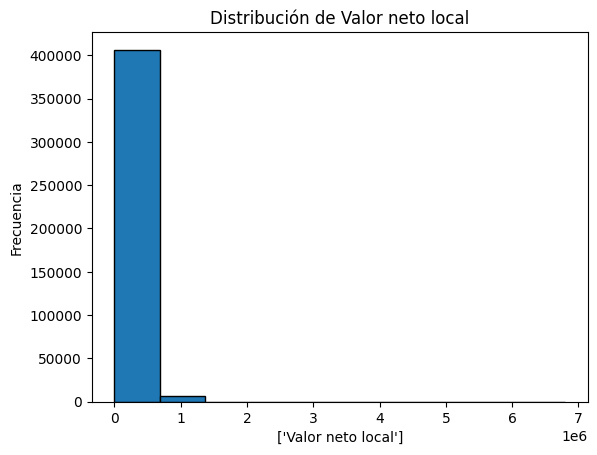

In [ ]:
# Código por elaboración propia

col = ['Valor neto local']
plt.figure()
plt.hist(df_original[col], edgecolor='k')
plt.title('Distribución de Valor neto local')
plt.xlabel(col)
plt.ylabel('Frecuencia')

plt.show()


Se valida por ultima vez que no se tengan valores faltantes en el dataset, para asegurar un buen funcionamiento de los algoritmos seleccionados.

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 05MBID del presente master.

# Se crea un diccionario para almacenar la cantidad de valores faltantes por columna
nulos_por_columna = {}

# Se genera la iteracion sobre las columnas del dataset
for col in df_original.columns:
    nulos = df_original[col].isna().sum()  # Cuenta los valores nulos
    if df_original[col].dtype == 'object':
        vacios = df_original[col].astype(str).str.strip().eq('').sum()  # Cuenta los valores vacíos
    else:
        vacios = 0
    nulos_por_columna[col] = nulos + vacios  # Suma los valores nulos y los vacíos

#  Se crea un DataFrame a partir del diccionario
nulos_x_columna = pd.DataFrame(nulos_por_columna.items(), columns=['Columna', 'Cantidad de Nulos y Vacíos'])

print(f"Cantidad de filas que tienen valores nulos y vacíos por atributo para el dataset general:\n \n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos y vacíos por atributo para el dataset general:
 
             Columna  Cantidad de Nulos y Vacíos
0               C.O.                           0
1              LINEA                           0
2              MARCA                           0
3            DEPORTE                           0
4             GENERO                           0
5      SUB CATEGORIA                           0
6          WEB COLOR                           0
7   Valor neto local                           0
8      Tipo de Marca                           0
9              Nivel                           0
10               Dia                           0
11               Mes                           0
12               Ano                           0
13         Trimestre                           0
14        Dia Semana                           0
15  Aplico_descuento                           0
16     Cantidad inv.                           0


A continuación, se va a mantener el dataset original y se van a crear dos dataset independientes para los datos normalizados y los datos categorizados.


In [ ]:
# Código por elaboración propia

from sklearn.preprocessing import StandardScaler

# Se definen las variables a normalizar
numeric_df = df_original[['Valor neto local']]

# Se ajusta el StandardScaler a los datos definidos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Se convierten los datos normalizados en un DataFrame
df_normalizado = pd.DataFrame(scaled_data, columns=['Valor neto local'])

df_normalizado.head()

,Valor neto local
0,-0.708202
1,-0.608214
2,-0.608214
3,-0.508226
4,-0.508226


In [ ]:
# Código por elaboración propia

from sklearn.preprocessing import OneHotEncoder

# Se definen las variables a categorizar
categorical_columns = ['LINEA', 'MARCA', 'DEPORTE', 'GENERO','SUB CATEGORIA', 'WEB COLOR', 'Tipo de Marca','Nivel', 'Dia', 'Mes', 'Ano', 'Trimestre', 'Dia Semana']

encoder = OneHotEncoder(sparse=False)

# Se ajusta el StandardScaler a los datos definidos
encoded_data = encoder.fit_transform(df_original[categorical_columns])

df_categorizado = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

df_categorizado.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,LINEA_ACCESORIOS,LINEA_CALZADO,LINEA_ROPA,MARCA_ADIDAS,MARCA_ASICS,MARCA_CREP PROTECT,MARCA_KEDS,MARCA_MERRELL,MARCA_NIKE,MARCA_ON,...,Trimestre_Q2,Trimestre_Q3,Trimestre_Q4,Dia Semana_Domingo,Dia Semana_Jueves,Dia Semana_Lunes,Dia Semana_Martes,Dia Semana_Miecoles,Dia Semana_Sabado,Dia Semana_Viernes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_categorizado.shape

(413301, 162)

Se unifican los datos normalizados, los datos categorizados y los datos faltantes del dataset original

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.

# Columnas del df_original que deseas incluir en el df_modelado
col_org = ['C.O.', 'Aplico_descuento', 'Cantidad inv.']

# Extraer las columnas deseadas de df_original
df_org = df_original[col_org]

# Concatenar df_normalizado, df_categorizado_tot y df_parte_original en df_modelado
df_modelado = pd.concat([df_normalizado, df_categorizado, df_org], axis=1)

# Mostrar las primeras filas del DataFrame resultante
df_modelado.head(2)


,Valor neto local,LINEA_ACCESORIOS,LINEA_CALZADO,LINEA_ROPA,MARCA_ADIDAS,MARCA_ASICS,MARCA_CREP PROTECT,MARCA_KEDS,MARCA_MERRELL,MARCA_NIKE,...,Dia Semana_Domingo,Dia Semana_Jueves,Dia Semana_Lunes,Dia Semana_Martes,Dia Semana_Miecoles,Dia Semana_Sabado,Dia Semana_Viernes,C.O.,Aplico_descuento,Cantidad inv.
0,-0.708202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,004,True,1
1,-0.608214,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,004,True,1


Teniendo en cuenta los algoritmos a utilizar, se realiza la busqueda de valores NaN y si la cantidad de filas con valores NaN no supera el 5% del total de filas, se eliminan.

In [ ]:
# Se realiza una adaptación del código utilizado en la materia 13MBID del presente master.

# Calcular el 5% del total de filas
umbral = df_modelado.shape[0] * 0.05

# Identificar las filas con al menos un valor NaN
nan = df_modelado[df_modelado.isna().any(axis=1)]

# Imprimir el número de filas con valores NaN
rows_nan = len(nan)
print("Número de filas con al menos un valor NaN:", rows_nan)

# Verificar si el número de filas con valores NaN supera el umbral
if rows_nan < umbral:
    print("El número de filas con valores NaN no supera el umbral del 5%. Eliminando filas...")
    # Eliminar las filas con valores NaN
    df_modelado_fin = df_modelado.dropna()
    print("Número de filas después de eliminar NaN:", len(df_modelado_fin))
else:
    print("El número de filas con valores NaN supera el umbral del 5%. No se eliminan filas.")



Número de filas con al menos un valor NaN: 0
El número de filas con valores NaN no supera el umbral del 5%. Eliminando filas...
Número de filas después de eliminar NaN: 413301


In [ ]:
df_modelado_fin.columns

Index(['Valor neto local', 'LINEA_ACCESORIOS', 'LINEA_CALZADO', 'LINEA_ROPA',
       'MARCA_ADIDAS', 'MARCA_ASICS', 'MARCA_CREP PROTECT', 'MARCA_KEDS',
       'MARCA_MERRELL', 'MARCA_NIKE',
       ...
       'Dia Semana_Domingo', 'Dia Semana_Jueves', 'Dia Semana_Lunes',
       'Dia Semana_Martes', 'Dia Semana_Miecoles', 'Dia Semana_Sabado',
       'Dia Semana_Viernes', 'C.O.', 'Aplico_descuento', 'Cantidad inv.'],
      dtype='object', length=166)

In [ ]:
print("Estas son las dimensiones del dataset despues de la categorizacion y normalizacion de las variables: \n", df_modelado_fin.shape )

Estas son las dimensiones del dataset despues de la categorizacion y normalizacion de las variables: 
 (413301, 166)


In [ ]:
df_modelado_fin.to_csv('datos_modelar_prueba1.csv', sep=';', index=False)

#Apéndice V:

El código presentado a continuación, es adaptado en base a la documentación de la libreria PyCaret.
URL: https://pycaret.gitbook.io/docs/get-started/quickstart#classification

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
df_modelado_fin = pd.read_csv('datos_modelar_prueba1.csv', sep=';', dtype={'C.O.': str})

In [ ]:
muestra = df_modelado_fin.sample(n=10000, random_state=71)

In [ ]:
# Configurar el entorno PyCaret
exp_clf=setup(data=muestra, target='C.O.')

,Description,Value
0,Session id,3638
1,Target,C.O.
2,Target type,Multiclass
3,Target mapping,"004: 0, 006: 1, 007: 2, 009: 3, 010: 4, 011: 5, 017: 6, 022: 7, 023: 8, 026: 9, 027: 10, 028: 11, 029: 12, 030: 13, 032: 14, 033: 15, 034: 16, 035: 17, 037: 18, 039: 19, 414: 20, 415: 21"
4,Original data shape,"(10000, 166)"
5,Transformed data shape,"(10000, 166)"
6,Transformed train set shape,"(7000, 166)"
7,Transformed test set shape,"(3000, 166)"
8,Numeric features,164
9,Preprocess,True


In [ ]:
models_to_compare = ['xgboost', 'gbc', 'lr', 'rf', 'dt']

# Comparar los modelos especificados
best_model = compare_models(include=models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3626,0.9249,0.3626,0.3409,0.3323,0.3234,0.3255,50.7790
rf,Random Forest Classifier,0.3450,0.9220,0.3450,0.3275,0.3231,0.3057,0.3069,4.0190
lr,Logistic Regression,0.3403,0.9233,0.3403,0.3217,0.3228,0.3012,0.3022,3.2490
xgboost,Extreme Gradient Boosting,0.3279,0.9219,0.3279,0.3173,0.3179,0.2891,0.2896,36.7930
dt,Decision Tree Classifier,0.3097,0.6361,0.3097,0.3107,0.3084,0.2723,0.2725,0.5680


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
model_name = str(best_model)

print("Modelo:", model_name)

Modelo: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3638, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
lr_model=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3657,0.9227,0.3657,0.3487,0.3503,0.3279,0.3289
1,0.3114,0.9200,0.3114,0.2902,0.2938,0.2707,0.2715
2,0.3614,0.9208,0.3614,0.3401,0.3387,0.3229,0.3242
3,0.3414,0.9227,0.3414,0.3283,0.3293,0.3031,0.3037
4,0.3486,0.9259,0.3486,0.3333,0.3288,0.3098,0.3109
5,0.3386,0.9252,0.3386,0.3085,0.3157,0.2990,0.3004
6,0.3100,0.9214,0.3100,0.2886,0.2953,0.2696,0.2702
7,0.3400,0.9251,0.3400,0.3195,0.3223,0.3013,0.3022
8,0.3443,0.9242,0.3443,0.3313,0.3290,0.3057,0.3067


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lr =tune_model(lr_model, optimize ='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3486,0.9215,0.3486,0.3359,0.3381,0.3105,0.3111
1,0.3071,0.9199,0.3071,0.2926,0.2957,0.2671,0.2676
2,0.3514,0.9197,0.3514,0.3290,0.3333,0.3131,0.3139
3,0.3443,0.9223,0.3443,0.3367,0.3365,0.3066,0.3070
4,0.3471,0.9253,0.3471,0.3327,0.3329,0.3091,0.3099
5,0.3457,0.9248,0.3457,0.3245,0.3282,0.3071,0.3082
6,0.2957,0.9205,0.2957,0.2825,0.2859,0.2553,0.2557
7,0.3371,0.9249,0.3371,0.3233,0.3258,0.2992,0.2998
8,0.3414,0.9237,0.3414,0.3267,0.3287,0.3032,0.3039


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
gbc_model=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3714,0.9233,0.3714,0.3314,0.3359,0.3325,0.3348
1,0.3486,0.9223,0.3486,0.3166,0.3143,0.3081,0.3103
2,0.3829,0.9244,0.3829,0.3574,0.3517,0.3450,0.3469
3,0.3600,0.9242,0.3600,0.3406,0.3305,0.3210,0.3232
4,0.3714,0.9282,0.3714,0.3652,0.3394,0.3327,0.3352
5,0.3629,0.9248,0.3629,0.3489,0.3330,0.3235,0.3256
6,0.3314,0.9222,0.3314,0.3161,0.3059,0.2904,0.2921
7,0.3700,0.9266,0.3700,0.3556,0.3414,0.3317,0.3337
8,0.3614,0.9257,0.3614,0.3375,0.3327,0.3225,0.3245


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_gbc =tune_model(gbc_model, optimize ='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3871,0.9266,0.3871,0.3398,0.3468,0.3489,0.3521
1,0.3486,0.9230,0.3486,0.3238,0.3114,0.3081,0.3107
2,0.3800,0.9242,0.3800,0.3438,0.3405,0.3413,0.3439
3,0.3600,0.9272,0.3600,0.3266,0.3241,0.3204,0.3232
4,0.3571,0.9248,0.3571,0.3263,0.3119,0.3163,0.3198
5,0.3771,0.9257,0.3771,0.3462,0.3356,0.3381,0.3415
6,0.3386,0.9219,0.3386,0.3148,0.3089,0.2979,0.2998
7,0.3571,0.9255,0.3571,0.3401,0.3258,0.3179,0.3199
8,0.3657,0.9262,0.3657,0.3418,0.3309,0.3265,0.3293


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
rf_model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3443,0.9215,0.3443,0.3350,0.3225,0.3045,0.3059
1,0.3329,0.9205,0.3329,0.3089,0.3117,0.2931,0.2941
2,0.3557,0.9233,0.3557,0.3334,0.3308,0.3165,0.3178
3,0.3457,0.9216,0.3457,0.3229,0.3226,0.3062,0.3074
4,0.3471,0.9274,0.3471,0.3317,0.3201,0.3071,0.3087
5,0.3657,0.9219,0.3657,0.3517,0.3423,0.3274,0.3291
6,0.3157,0.9159,0.3157,0.2901,0.2955,0.2752,0.2759
7,0.3600,0.9232,0.3600,0.3592,0.3426,0.3219,0.3230
8,0.3286,0.9207,0.3286,0.3060,0.3053,0.2887,0.2898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf =tune_model(rf_model, optimize ='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3357,0.9226,0.3357,0.1636,0.2022,0.2884,0.3088
1,0.3486,0.9192,0.3486,0.2000,0.2178,0.3026,0.3218
2,0.3514,0.9194,0.3514,0.1695,0.2129,0.3054,0.3268
3,0.3471,0.9196,0.3471,0.1932,0.2137,0.3008,0.3222
4,0.3529,0.9221,0.3529,0.1656,0.2121,0.3073,0.3280
5,0.3471,0.9235,0.3471,0.1989,0.2132,0.3007,0.3209
6,0.3329,0.9188,0.3329,0.2214,0.1998,0.2853,0.3059
7,0.3371,0.9231,0.3371,0.1646,0.2010,0.2904,0.3110
8,0.3286,0.9216,0.3286,0.1582,0.1969,0.2812,0.2997


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3638, verbose=0, warm_start=False)

In [ ]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=5,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=190, n_iter_no_change=None,
                           random_state=3638, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3638, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)